In [19]:
import pandas as pd

️⃣ Project Context

Our dataset is from Netflix, containing information about Movies and TV Shows available on the platform.
The dataset helps us explore:

What kind of content Netflix provides

Where it comes from (countries)

When it was released

What genres are most common

📁 Dataset Name: netflix_titles.csv
📊 Rows: 8807 | Columns: 12

In [26]:
data=pd.read_csv(rf'netflix_titles.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [42]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,nan,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",nan,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,nan,unknown,nan,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,nan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [27]:
data.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

In [28]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

📊 Insights:

Netflix has more Movies than TV Shows

Most titles are rated TV-MA (for mature audiences)

Content comes mostly from the United States

4️⃣ Final Summary (Phase 1)

- ✅ The Netflix dataset is well-structured with 12 columns.
- ✅ Some columns (like director, cast, and country) have missing data.
- ✅ Column listed_in describes genres — we’ll rename it to genre in the next phase.

# DATA CLEANING & MANIPULATION

Handle Missing Data

In [30]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Remove Duplicates

In [31]:
data=data.drop_duplicates()

Fix Inconsistencies in Categorical Data

In [35]:
data = data.rename(columns={'listed_in': 'genre'})

data['type'] = data['type'].astype(str).str.strip()
data['title'] = data['title'].astype(str).str.strip()
data['director'] = data['director'].astype(str).str.strip()
data['country'] = data['country'].astype(str).str.strip()
data['rating'] = data['rating'].astype(str).str.strip()
data['genre'] = data['genre'].astype(str).str.strip()


In [38]:
data['director']=data['director'].fillna('unknown')
data['country']=data['country'].fillna('unknown')
data['cast']=data['cast'].fillna('unknown')
data['date_added']=data['date_added'].fillna('unknown')
data['rating']=data['rating'].fillna('unknown')
data['duration']=data['duration'].fillna('unknown')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  genre         8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


How many Movies and TV Shows are there?

In [43]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Which country has the most content?

In [45]:
data['country'].value_counts().sort_values(ascending=True)

country
Denmark, United Kingdom, South Africa, Sweden, Belgium       1
Germany, Canada, United States                               1
Ireland, Canada, United States, United Kingdom               1
New Zealand, United Kingdom, Australia                       1
United Kingdom, Australia, Canada, United States             1
                                                          ... 
Japan                                                      245
United Kingdom                                             419
nan                                                        831
India                                                      972
United States                                             2818
Name: count, Length: 749, dtype: int64

In [49]:
data['release_year'].value_counts().sort_values(ascending=True)

release_year
1966       1
1961       1
1959       1
1947       1
1925       1
        ... 
2016     902
2020     953
2019    1030
2017    1032
2018    1147
Name: count, Length: 74, dtype: int64

What are the most common genres?

In [50]:
data['genre'].value_counts().sort_values(ascending=True)

genre
Cult Movies, Dramas, Thrillers                                    1
Crime TV Shows, TV Dramas, TV Horror                              1
British TV Shows, Docuseries, Reality TV                          1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows      1
Anime Series, Crime TV Shows, TV Thrillers                        1
                                                               ... 
Dramas, Independent Movies, International Movies                252
Comedies, Dramas, International Movies                          274
Stand-Up Comedy                                                 334
Documentaries                                                   359
Dramas, International Movies                                    362
Name: count, Length: 514, dtype: int64

What are the most common Ratings?

In [52]:
data['rating'].value_counts().sort_values(ascending=True)

rating
66 min         1
74 min         1
84 min         1
NC-17          3
UR             3
nan            4
TV-Y7-FV       6
G             41
NR            80
TV-G         220
PG           287
TV-Y         307
TV-Y7        334
PG-13        490
R            799
TV-PG        863
TV-14       2160
TV-MA       3207
Name: count, dtype: int64

# DATA VISUALIZATION & INSIGHTS

Movies vs TV Shows

In [53]:
import matplotlib.pyplot as plt

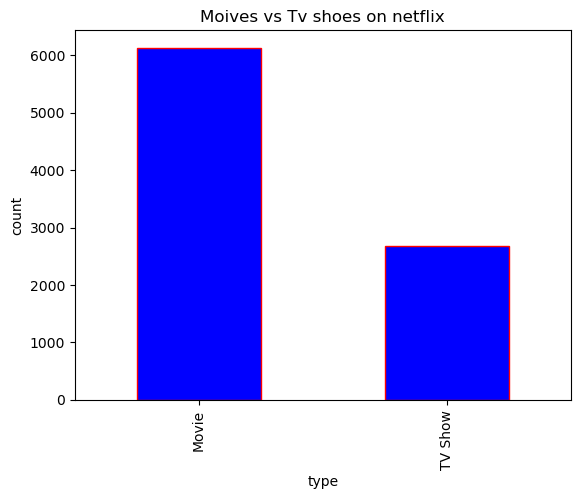

In [56]:
data['type'].value_counts().plot(kind='bar',color='blue',edgecolor='red')
plt.title('Moives vs Tv shoes on netflix')
plt.xlabel('type')
plt.ylabel('count')
plt.show()

Netflix has more Movies than TV Shows.

# Top 10 Countries (Where Content Comes From)

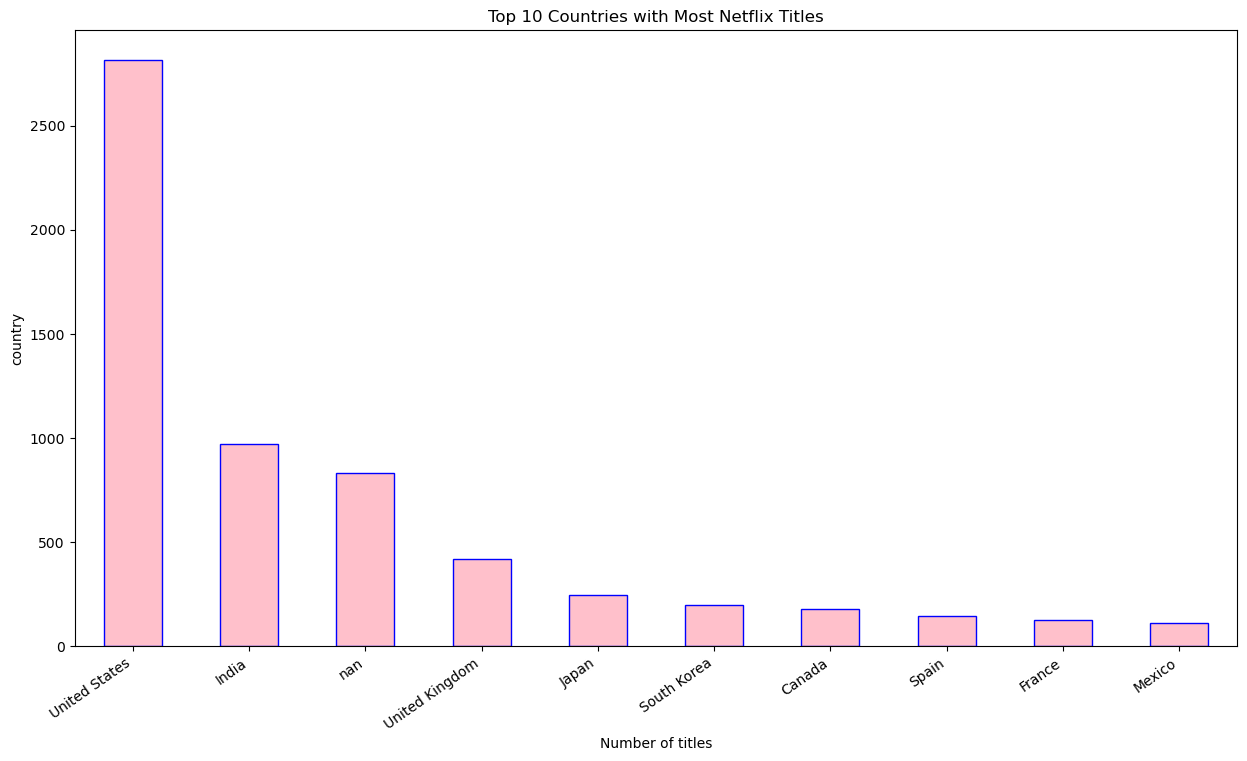

In [70]:
country_counts=data['country'].value_counts().head(10)
plt.figure(figsize=(15,8))
country_counts.plot(kind='bar',color='pink',edgecolor='blue')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel('Number of titles')
plt.ylabel('country')
plt.xticks(rotation=35,ha='right')
plt.show()

# Year-wise Netflix Releases

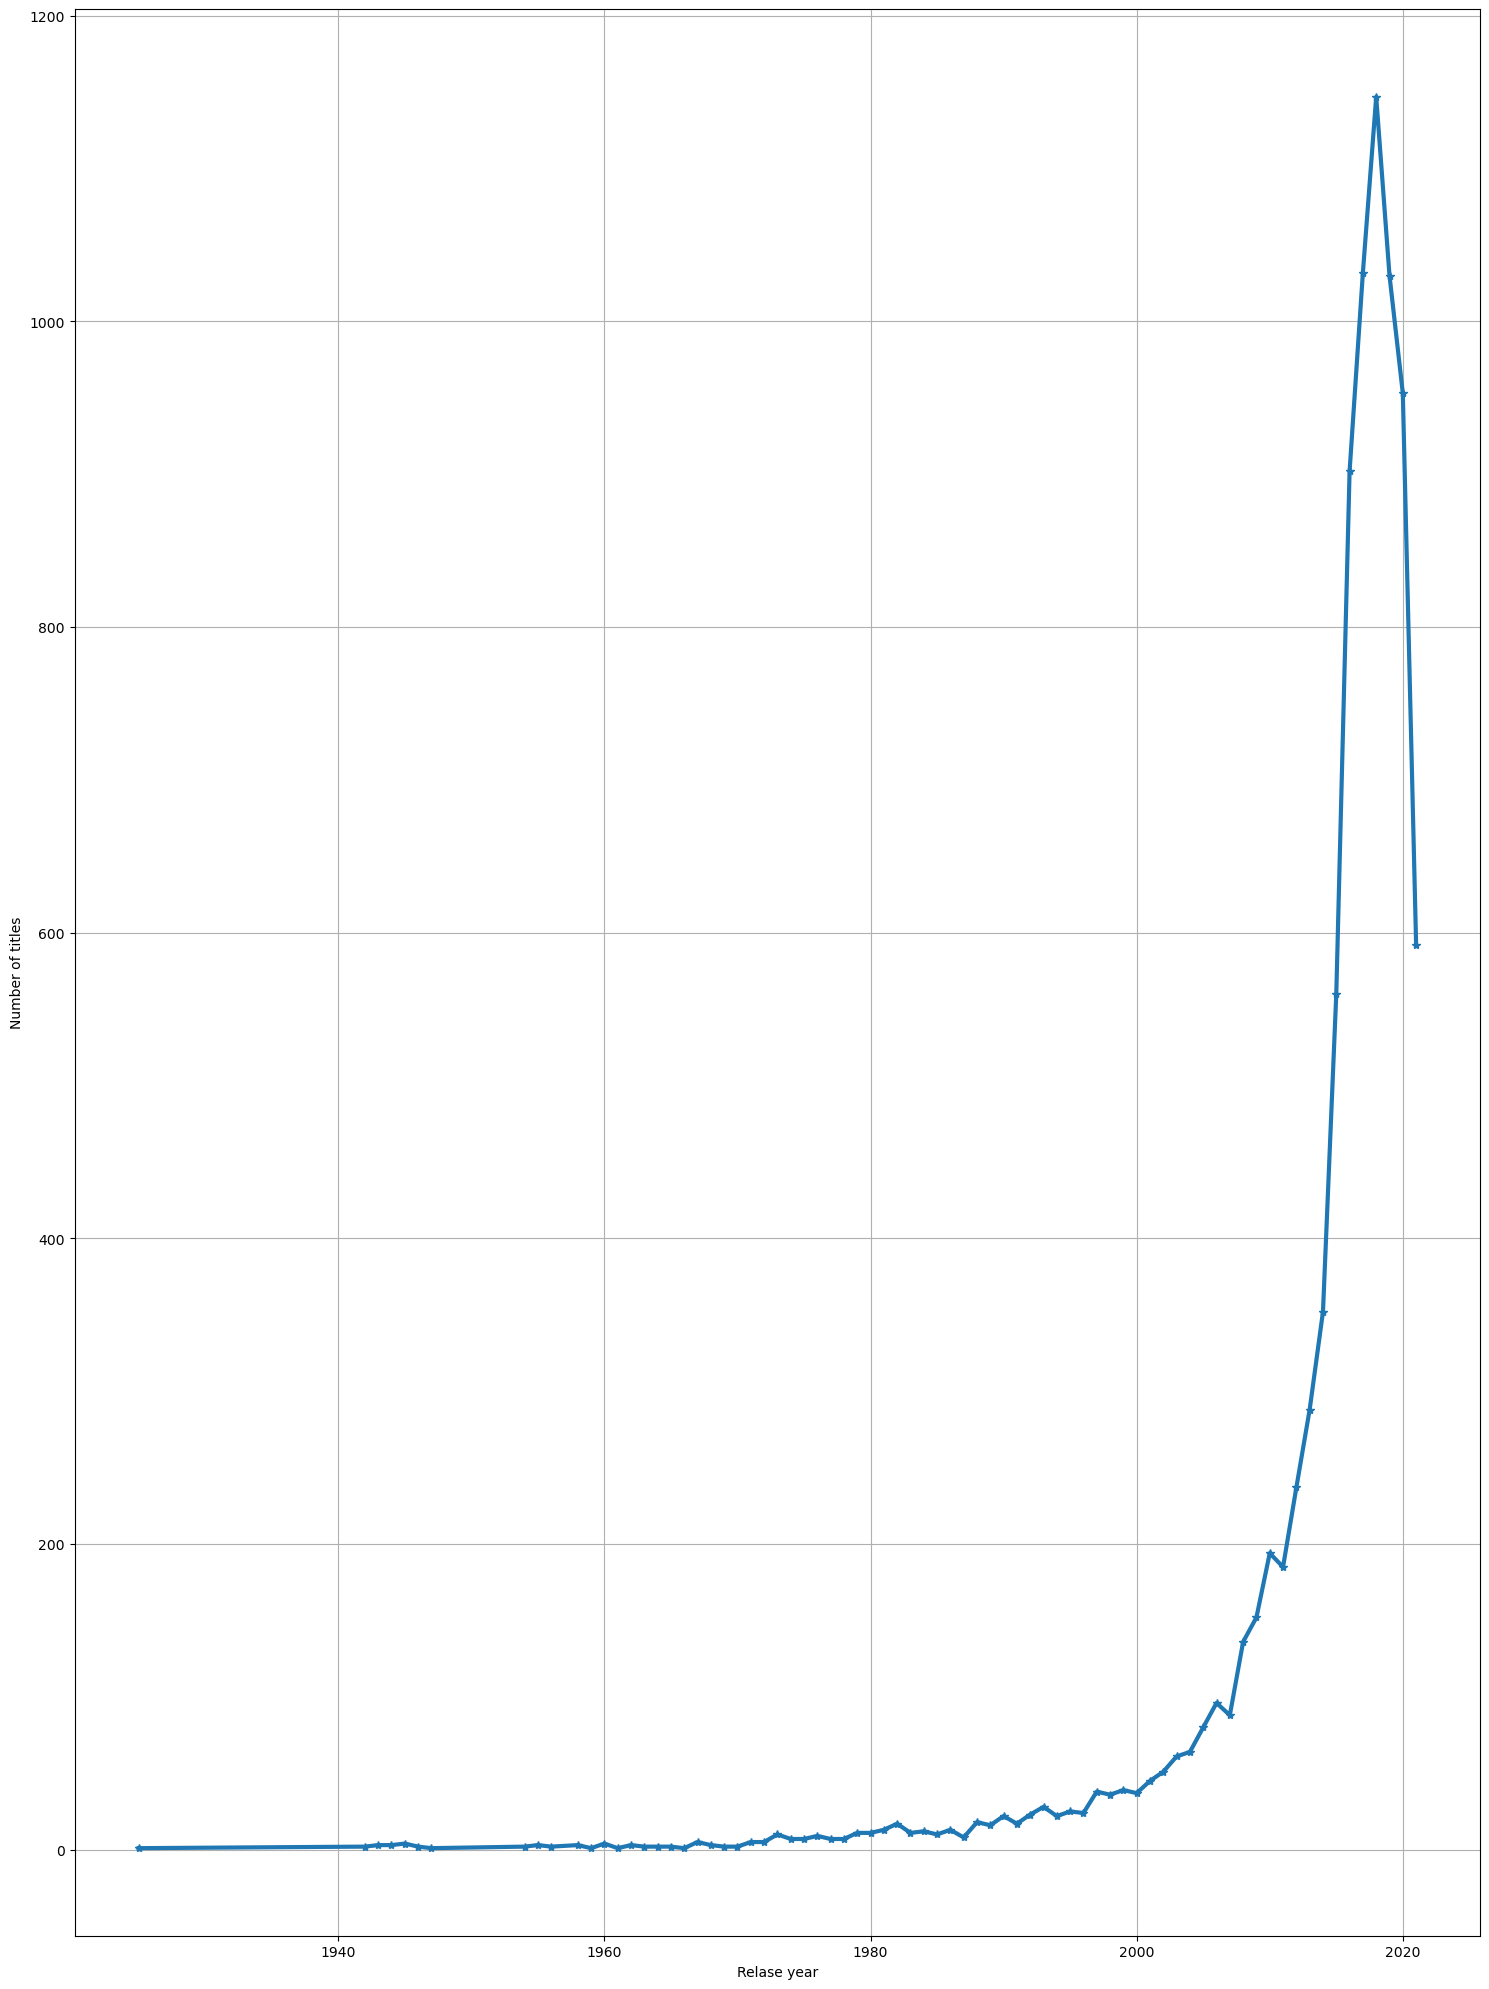

In [75]:
yearly_counts=data['release_year'].value_counts().sort_index()
plt.figure(figsize=(15,20))
yearly_counts.plot(kind='line',marker='*',linewidth=3)
plt.xlabel('Relase year')
plt.ylabel('Number of titles')
plt.grid(True)
plt.tight_layout()
plt.show()

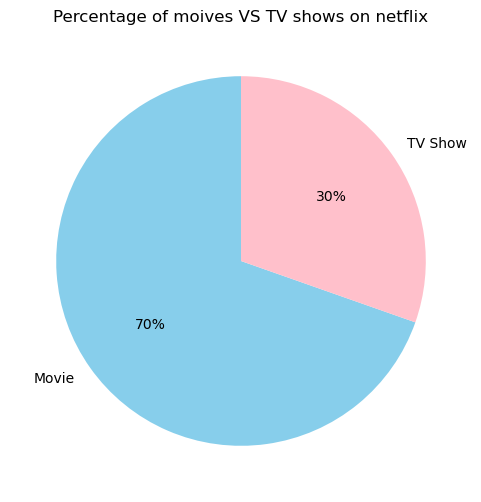

In [79]:
types=data['type'].value_counts()
plt.figure(figsize=(15,6))
types.plot(kind='pie',autopct='%1.f%%',startangle=90,colors=['skyblue','pink'])
plt.title("Percentage of moives VS TV shows on netflix")
plt.ylabel('')
plt.show()

C:\Users\A.Manohar\AppData\Local\Temp\ipykernel_20312\2605872895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['duration'] = movie_data['duration'].str.replace(' min', '', regex=False)
C:\Users\A.Manohar\AppData\Local\Temp\ipykernel_20312\2605872895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['duration'] = pd.to_numeric(movie_data['duration'], errors='coerce')


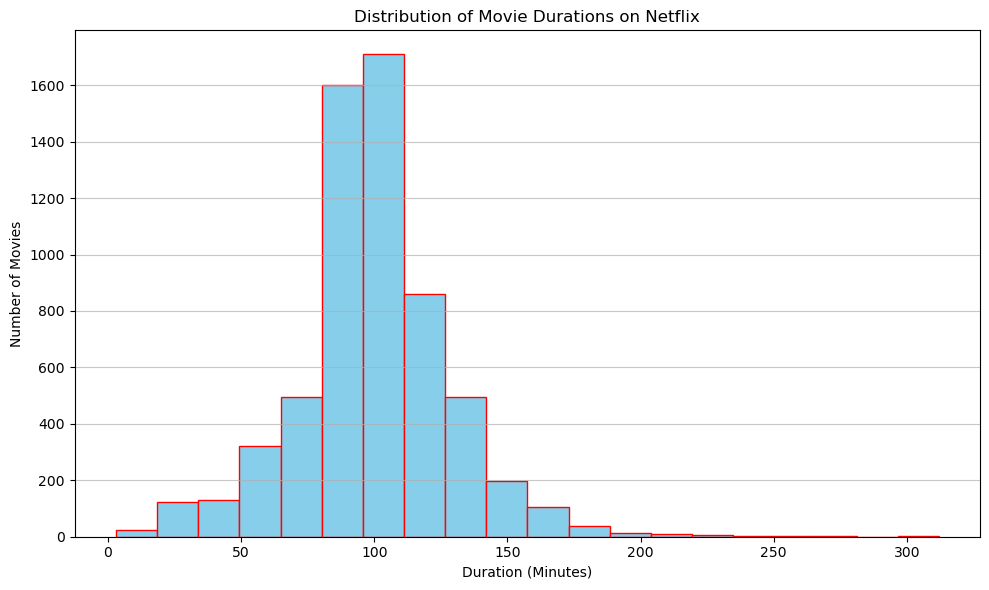

In [84]:
movie_data = data[data['type'] == 'Movie']   # ✅ correct spelling
movie_data['duration'] = movie_data['duration'].str.replace(' min', '', regex=False)
movie_data['duration'] = pd.to_numeric(movie_data['duration'], errors='coerce')

plt.figure(figsize=(10,6))
plt.hist(movie_data['duration'].dropna(), bins=20, color='skyblue', edgecolor='red')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()


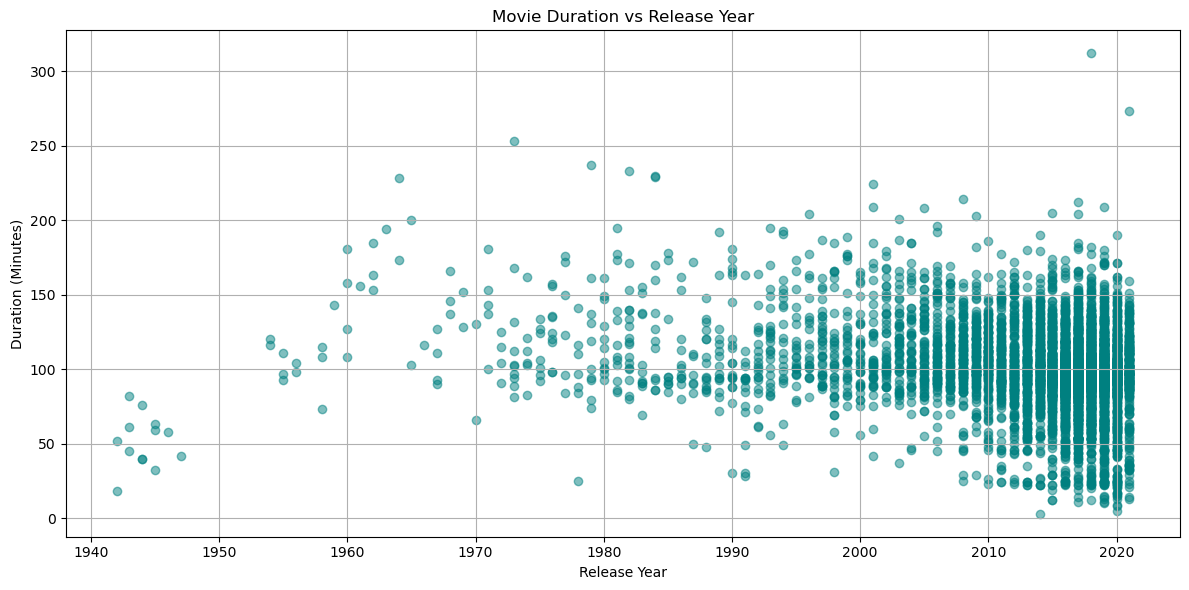

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
movie_data = data[data['type'] == 'Movie'].copy()
movie_data['duration'] = movie_data['duration'].str.replace(' min', '', regex=False)
movie_data['duration'] = pd.to_numeric(movie_data['duration'], errors='coerce')
plt.figure(figsize=(12,6))
plt.scatter(movie_data['release_year'], movie_data['duration'], color='teal', alpha=0.5)
plt.title('Movie Duration vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()